In [48]:
import pandas as pd
import seaborn as sns
import datetime
import warnings
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Questions
# should I do by State otr by county
# 

## Data Examination

In [3]:
df = pd.read_csv('crude_rate.csv')

In [4]:
df.head()
df.tail()
len(df)

816

In [5]:
# chenking for null values
df.isnull().sum()

State                                                              0
Year                                                               0
Deaths                                                             0
Population                                                         0
Crude Rate                                                         0
Crude Rate Lower 95% Confidence Interval                           0
Crude Rate Upper 95% Confidence Interval                           0
Prescriptions Dispensed by US Retailers in that year (millions)    0
dtype: int64

In [6]:
df.Deaths.unique()

array(['39', '46', '67', '75', '54', '92', '83', '134', '172', '195',
       '210', '194', '180', '175', '282', '28', '27', '17', 'Suppressed',
       '14', '11', '19', '29', '16', '94', '71', '72', '81', '69', '79',
       '250', '249', '275', '340', '350', '360', '393', '479', '490',
       '515', '625', '650', '596', '565', '545', '616', '20', '30', '96',
       '98', '133', '127', '149', '156', '221', '198', '176', '181',
       '179', '1598', '1105', '605', '1583', '1530', '1547', '1485',
       '1602', '1762', '1889', '2128', '2059', '2057', '1847', '2088',
       '2159', '169', '184', '204', '206', '229', '233', '310', '337',
       '368', '365', '412', '325', '423', '415', '443', '532', '158',
       '173', '174', '168', '196', '238', '220', '225', '213', '202',
       '442', '531', '32', '36', '40', '38', '33', '42', '52', '68', '93',
       '116', '115', '86', '125', '43', '48', '60', '53', '45', '62',
       '13', '57', '65', '417', '571', '890', '1001', '1080', '1258',
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
State                                                              816 non-null object
Year                                                               816 non-null int64
Deaths                                                             816 non-null object
Population                                                         816 non-null int64
Crude Rate                                                         816 non-null object
Crude Rate Lower 95% Confidence Interval                           816 non-null object
Crude Rate Upper 95% Confidence Interval                           816 non-null object
Prescriptions Dispensed by US Retailers in that year (millions)    816 non-null int64
dtypes: int64(3), object(5)
memory usage: 51.1+ KB


In [8]:
# Change the world supressed ( deahts btw 0-9) to 0 maybe change by the mean
df = df.replace('Suppressed', 0)

In [9]:
# convert the obj to numeric
df['Deaths'] = pd.to_numeric(df['Deaths'])


In [10]:
df.describe()

,Year,Deaths,Population,Prescriptions Dispensed by US Retailers in that year (millions)
count,816.000000,816.000000,8.160000e+02,816.000000
mean,2006.500000,354.716912,5.871569e+06,174.625000
std,4.612599,383.825068,6.561914e+06,32.807063
min,1999.000000,0.000000,4.917800e+05,116.000000
25%,2002.750000,76.500000,1.580634e+06,147.250000
50%,2006.500000,219.500000,4.112482e+06,179.000000
75%,2010.250000,505.250000,6.589866e+06,203.250000
max,2014.000000,2175.000000,3.880250e+07,219.000000


In [11]:
df.State.unique()
df.head(31)

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149
5,Alabama,2004,92,4530729,2,1.6,2.5,155
6,Alabama,2005,83,4569805,1.8,1.4,2.3,163
7,Alabama,2006,134,4628981,2.9,2.4,3.4,174
8,Alabama,2007,172,4672840,3.7,3.1,4.2,184
9,Alabama,2008,195,4718206,4.1,3.6,4.7,196


In [12]:
df.State.unique()
df.head()
df_sub = df.set_index(df.State)
df_sub.head()
# len(df_sub)

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
State,,,,,,,,
Alabama,Alabama,1999,39,4430141,0.9,0.6,1.2,116
Alabama,Alabama,2000,46,4447100,1,0.8,1.4,126
Alabama,Alabama,2001,67,4467634,1.5,1.2,1.9,138
Alabama,Alabama,2002,75,4480089,1.7,1.3,2.1,142
Alabama,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [13]:
# Functions
def subseting (df , x , y):
    df_copy = df.copy()
    df_copy = df_copy.iloc[ x: y , :]
    df_copy = df_copy[[ 'Year' , 'Deaths']]
    return df_copy

def convert_to_dt(row):
    dt = datetime.datetime(row.Year, 1, 1)
    return dt


In [31]:
df_Alabama = subseting(df, 0 , 16)
df_Alabama
df_Alabama.head()

,Year,Deaths
0,1999,39
1,2000,46
2,2001,67
3,2002,75
4,2003,54


In [39]:
def convert_to_dt(row):
    dt = datetime.datetime(row.Year, 1, 1)
    return dt

In [40]:
df_Alabama.Year = df_Alabama.apply(convert_to_dt, axis=1)
# df_Alabama.info()
# df_Alabama = df_Alabama.set_index('Year', inplace=True)
# df_Alabama.head()
df_Alabama

In [41]:
df_Alabama.Year

0    1999-01-01
1    2000-01-01
2    2001-01-01
3    2002-01-01
4    2003-01-01
5    2004-01-01
6    2005-01-01
7    2006-01-01
8    2007-01-01
9    2008-01-01
10   2009-01-01
11   2010-01-01
12   2011-01-01
13   2012-01-01
14   2013-01-01
15   2014-01-01
Name: Year, dtype: datetime64[ns]

In [42]:
df_Alabama.set_index('Year', inplace = True)

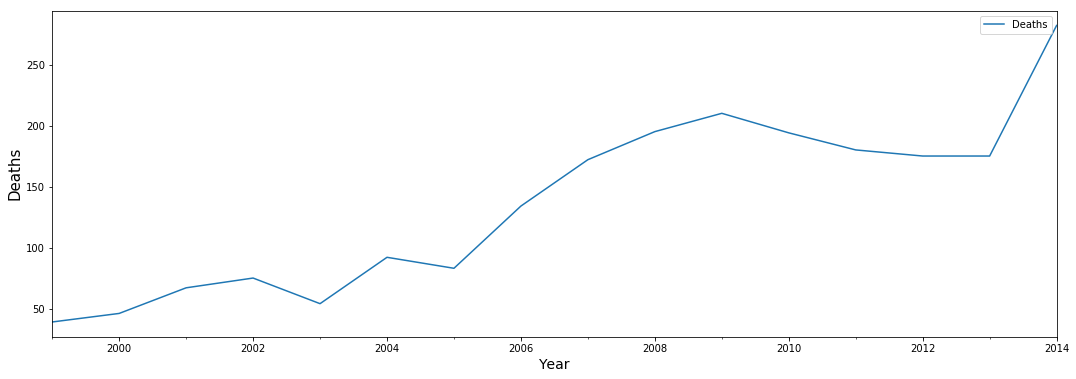

In [43]:
df_Alabama.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize = 15)
plt.show()
# this grap looks exponential

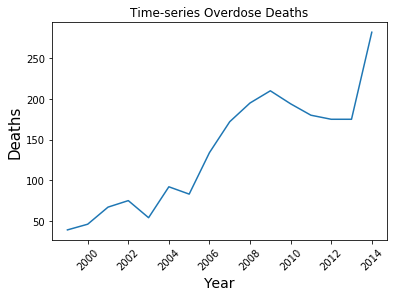

In [46]:
# Plot time series data
f, ax = plt.subplots(1,1)
ax.plot(df_Alabama['Deaths'])

# Add title
ax.set_title('Time-series Overdose Deaths')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize = 15)

# Show graph
plt.show()
plt.close()

## Stationarity

In [50]:
df_Alabama  = np.log(df_Alabama).diff()

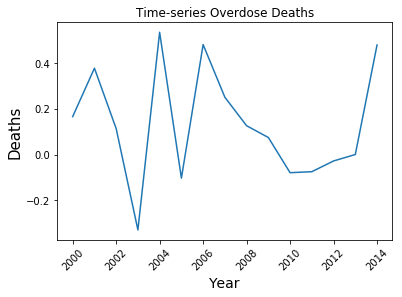

In [51]:
# Plot time series data
f, ax = plt.subplots(1,1)
ax.plot(df_Alabama['Deaths'])

# Add title
ax.set_title('Time-series Overdose Deaths')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize = 15)

# Show graph
plt.show()
plt.close()

In [ ]:
# df_example['Year'] = df_example['ts_log'].diff()


In [62]:
df_county = pd.read_csv('overdose_county.csv')

In [70]:

df_county.head(30)

,County,County Code,Year,Year Code,Deaths,Population,Crude Rate
0,"Autauga County, AL",1001,1999,1999,361,42963,840.3
1,"Autauga County, AL",1001,2000,2000,356,43671,815.2
2,"Autauga County, AL",1001,2001,2001,362,44889,806.4
3,"Autauga County, AL",1001,2002,2002,388,45909,845.2
4,"Autauga County, AL",1001,2003,2003,400,46800,854.7
5,"Autauga County, AL",1001,2004,2004,377,48366,779.5
6,"Autauga County, AL",1001,2005,2005,454,49676,913.9
7,"Autauga County, AL",1001,2006,2006,457,51328,890.4
8,"Autauga County, AL",1001,2007,2007,406,52405,774.7
9,"Autauga County, AL",1001,2008,2008,457,53277,857.8


In [65]:
len(df_county.County.unique())

3133

In [69]:
df_county.County.value_counts()

Covington County, AL                     19
Uvalde County, TX                        19
Cherokee County, TX                      19
East Carroll Parish, LA                  19
Sheridan County, MT                      19
Monterey County, CA                      19
Rush County, KS                          19
New Hanover County, NC                   19
Vanderburgh County, IN                   19
Cannon County, TN                        19
Blaine County, ID                        19
Blaine County, OK                        19
Bacon County, GA                         19
Mower County, MN                         19
Rockland County, NY                      19
Grand County, CO                         19
Randolph County, AL                      19
Grundy County, IL                        19
Kenai Peninsula Borough, AK              19
Norton city, VA                          19
Manassas Park city, VA                   19
St. Mary Parish, LA                      19
East Feliciana Parish, LA       